In [1]:
import seaborn as sns
penguin_df = sns.load_dataset("penguins")

# Pandas 

In [2]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


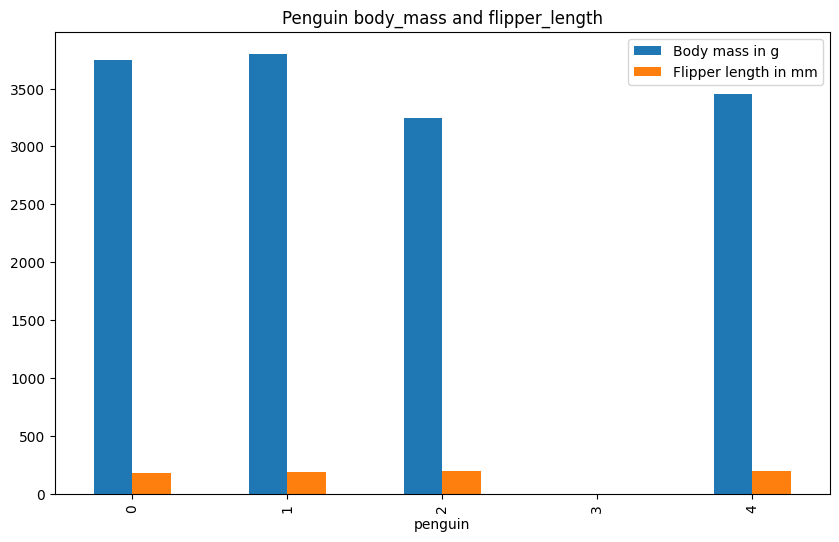

In [3]:
ax = penguin_df.head(5)[['body_mass_g','flipper_length_mm']].plot(kind="bar", figsize=(10,6));
ax.set_xlabel("penguin")
ax.set_title("Penguin body_mass and flipper_length")
ax.legend(['Body mass in g', 'Flipper length in mm']);

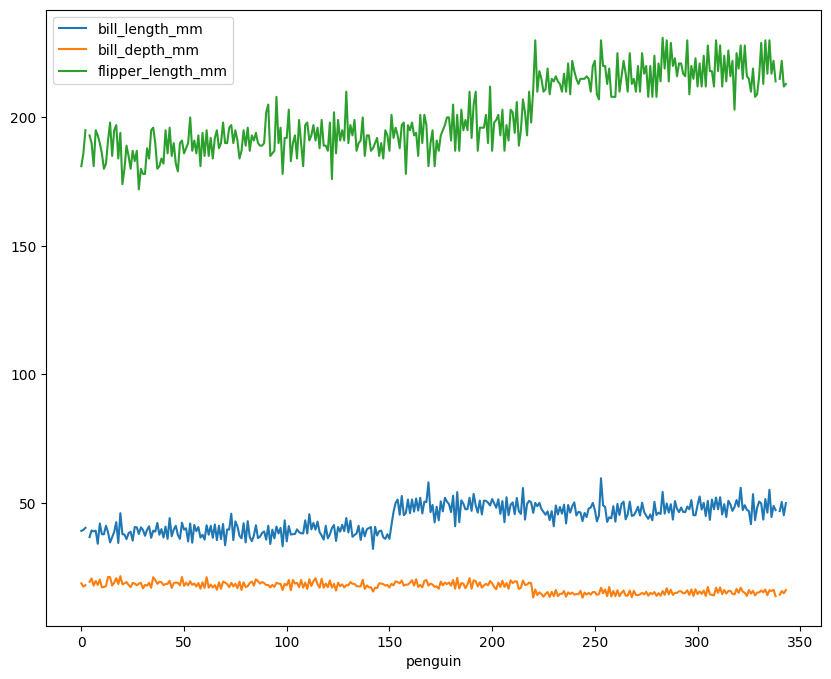

In [4]:
ax = penguin_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].plot(figsize=(10,8));
ax.set_xlabel("penguin");

# Multi axis graphs

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
NBA_df = pd.read_csv("NBA.csv")
X = NBA_df[['mp']]
y = NBA_df['win_rating']

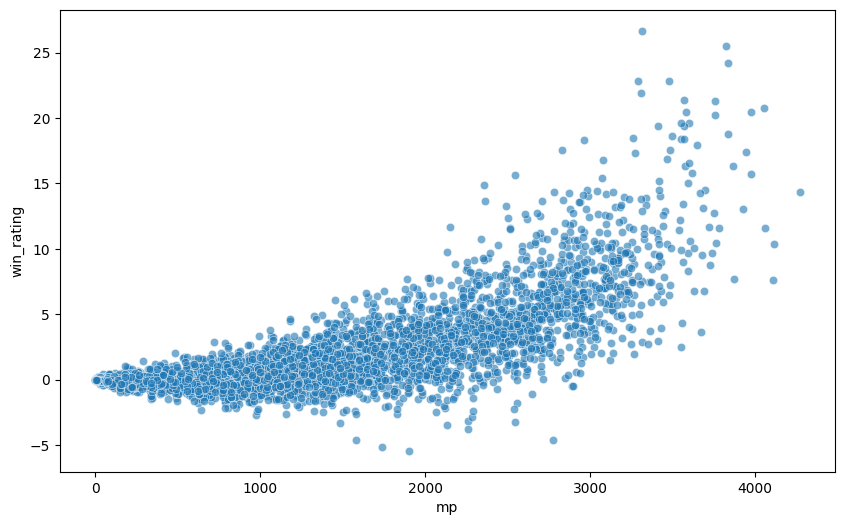

In [8]:
ax = plt.figure(figsize=(10,6))
sns.scatterplot(x=X['mp'], y=y, alpha=.6);

In [9]:
model = LinearRegression()
total_comp_time = pd.DataFrame(index=range(2,21), columns=['total computational time', 'mean score'])
for K in range(2,21):
    cross_val_results = cross_validate(model, X, y, cv=K)
    total_comp_time['total computational time'][K] = cross_val_results['fit_time'].sum()+cross_val_results['score_time'].sum()
    total_comp_time['mean score'][K] = cross_val_results['test_score'].mean()
total_comp_time.head(3)

total computational time mean score
2                 0.014848   0.558595
3                 0.013522   0.558666
4                 0.012734   0.559367

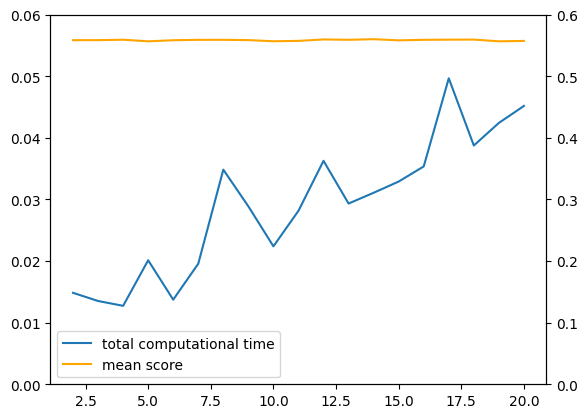

In [12]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(total_comp_time['total computational time'])
ax.set_ylim(0, .06)
ax2.set_ylim(0,.6)
ax2.plot(total_comp_time['mean score'], color="orange")
ax2.legend([ax.get_lines()[0], ax2.get_lines()[0]],\
           ['total computational time','mean score']);

Model R2: 0.5441185829799919


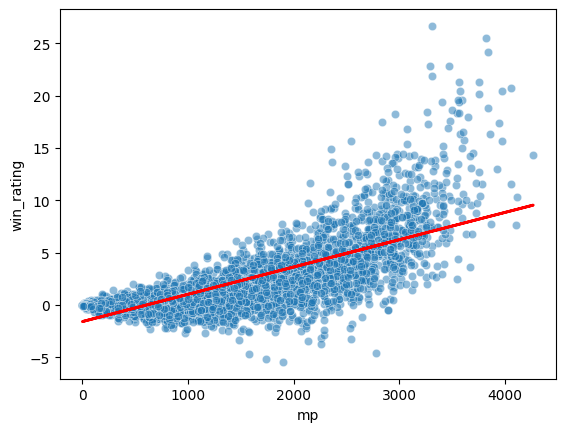

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

X = NBA_df[['mp']]
y = NBA_df['win_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

# scoring the model
lin_reg_score = model.score(X_test, y_test)
print("Model R2:", lin_reg_score)

# extracting the coefficients and regression function
regression = model.coef_[0] * NBA_df['mp'] + model.intercept_

# plotting the data and learned regression function
sns.scatterplot(data=NBA_df, x='mp', y='win_rating', alpha=0.5)
plt.plot(NBA_df['mp'], regression, color='red', linewidth=2);

# Plotly

## Geolocalized plots 

In [5]:
import pandas as pd
import plotly.express as px

In [6]:
file = 'https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/FastFoodRestaurants.csv'
df = pd.read_csv(file)

In [7]:
restaurants_df=pd.concat([df.groupby('city').count()['keys'], 
           df.groupby('city').mean()[['latitude', 'longitude']]], 
          axis=1).rename(
        columns={'keys': 'count','latitude':'lat', 'longitude':'lon'})

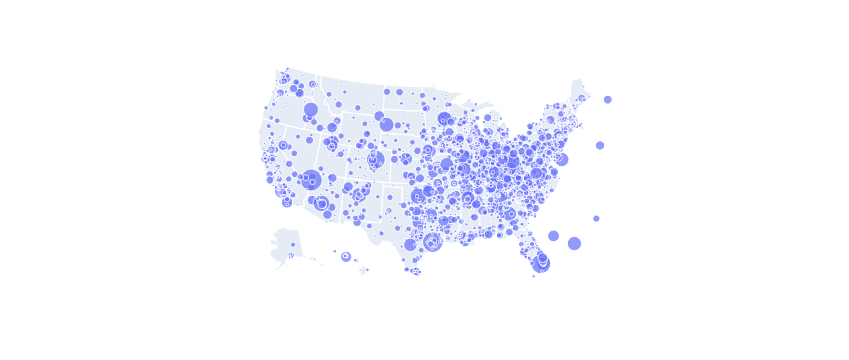

In [8]:
fig = px.scatter_geo(restaurants_df, lat='lat', lon='lon', 
                     hover_name=restaurants_df.index, size="count")
fig.update_layout( # to add options, like 'scope'
        geo = dict(
            scope = 'usa'
        )
    )
# fig.write_html("graph.html") # export interactive graph to html
fig.show()

# Matplotlib

In [9]:
import matplotlib.pyplot as plt
import numpy as np

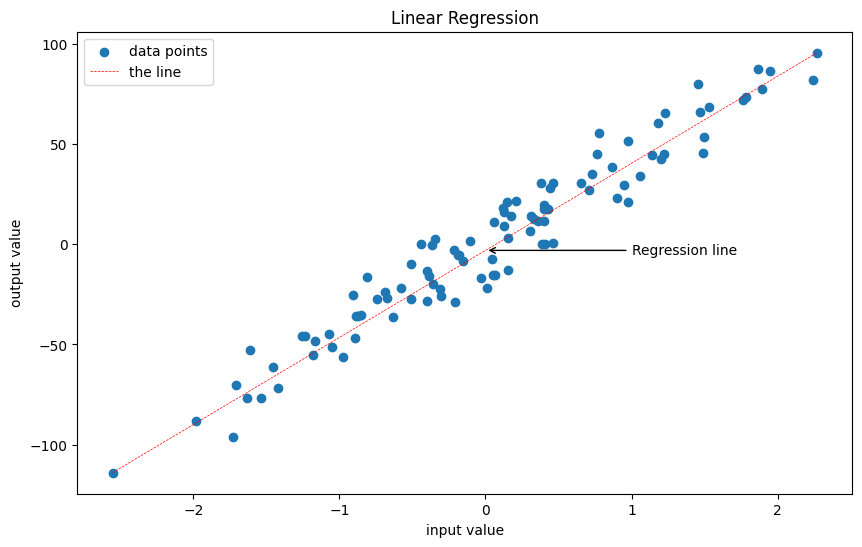

In [10]:
from sklearn import datasets
x, y, _ = datasets.make_regression(n_samples=100, n_features=1, noise=10, coef=True, random_state=0)
plt.scatter(x,y, label="data points");
plt.plot([min(x),max(x)],[y[x.argmin()],y[x.argmax()]], linestyle="dashed", color="red", linewidth=0.5, label="the line");
slope = (y[x.argmax()]-y[x.argmin()])/(max(x)-min(x))
intercept = y[x.argmax()] - slope*max(x)
plt.title("Linear Regression")
plt.legend(loc="best")
plt.xlabel("input value")
plt.ylabel("output value")
plt.annotate("Regression line", (0,intercept), (1,-5), arrowprops={"arrowstyle":"->"});
fig = plt.gcf()
fig.set_figheight(6)
fig.set_figwidth(10)

# Seaborn

In [11]:
import seaborn as sns
penguin_df = sns.load_dataset("penguins")

In [12]:
penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [13]:
species_df= penguin_df.groupby(['species','island']).count()['sex'].rename('count').reset_index()

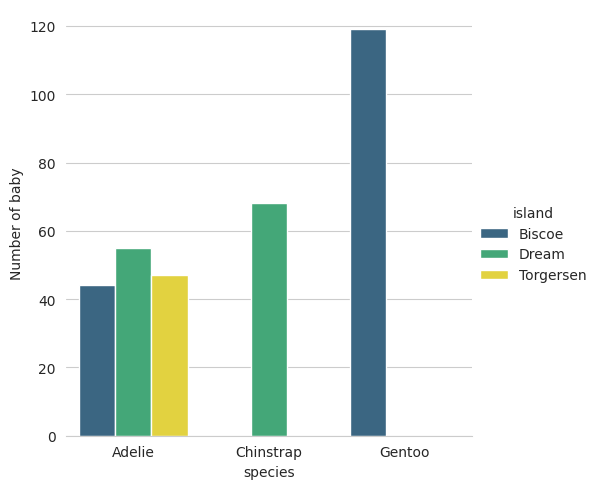

In [15]:
colors = ['#2f688e','#34b779','#fde825']
sns.set_style('whitegrid')
g = sns.catplot(x="species", y="count", hue="island", data=species_df,
                height=5, kind="bar", 
                palette=sns.color_palette(colors))
g.despine(left=True)
g.set_ylabels("Number of baby");

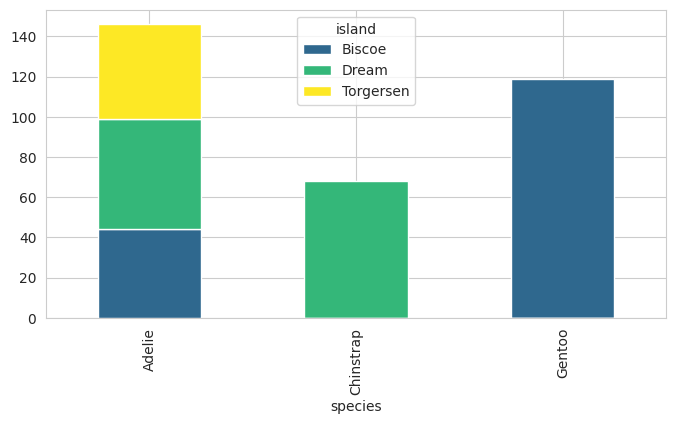

In [21]:
df_pivot = species_df.pivot(index='species', columns='island', values='count')
df_pivot.loc[:,['Biscoe','Dream', 'Torgersen']].plot.bar(stacked=True, color=colors, figsize=(8,4));

## Scatter plots

In [48]:
df1 = pd.DataFrame(np.random.normal(loc=-1, scale=1, size=(200, 2)), columns=['x','y'])
df1['category'] = "first sample"
df2 = pd.DataFrame(np.random.normal(loc=3, scale=1.3, size=(200, 2))+[[0, 1]], columns=['x','y'])
df2['category'] = "second sample"
df3 = pd.DataFrame(np.random.normal(loc=4, scale=1.1, size=(200, 2))+[[0, -7]], columns=['x','y'])
df3['category'] = "third sample"

In [50]:
df = pd.concat([df1,df2,df3], axis=0)

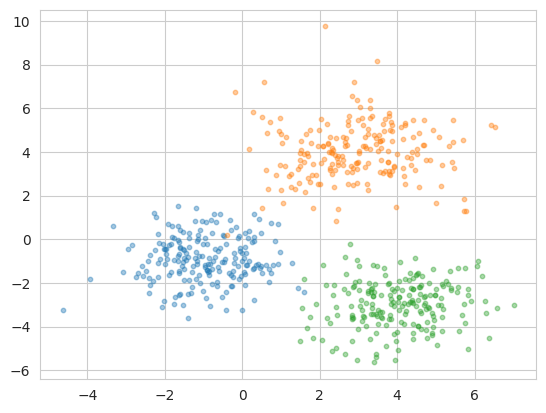

In [76]:
plt.scatter(df1["x"],df1["y"],s=10, alpha=.4)
plt.scatter(df2["x"],df2["y"], alpha=.4, s=10)
plt.scatter(df3["x"],df3["y"], alpha=.4, s=10);

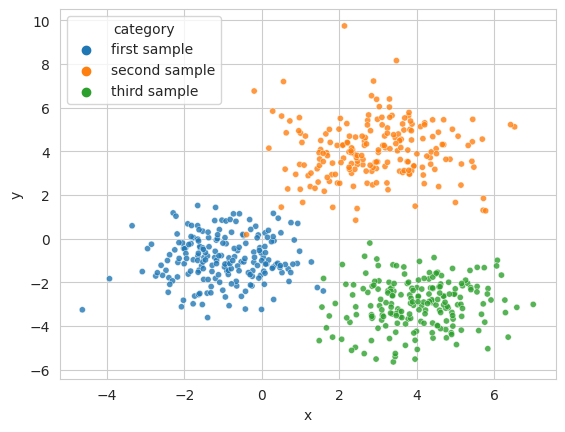

In [66]:
sns.scatterplot(data=df, x='x', y='y', hue='category', alpha=.8, s=20, markers='-');

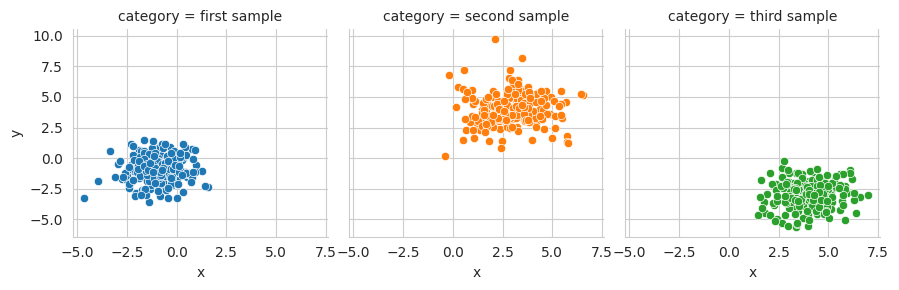

In [67]:
g = sns.FacetGrid(data=df, col='category', hue='category')
g.map(sns.scatterplot, "x", "y");

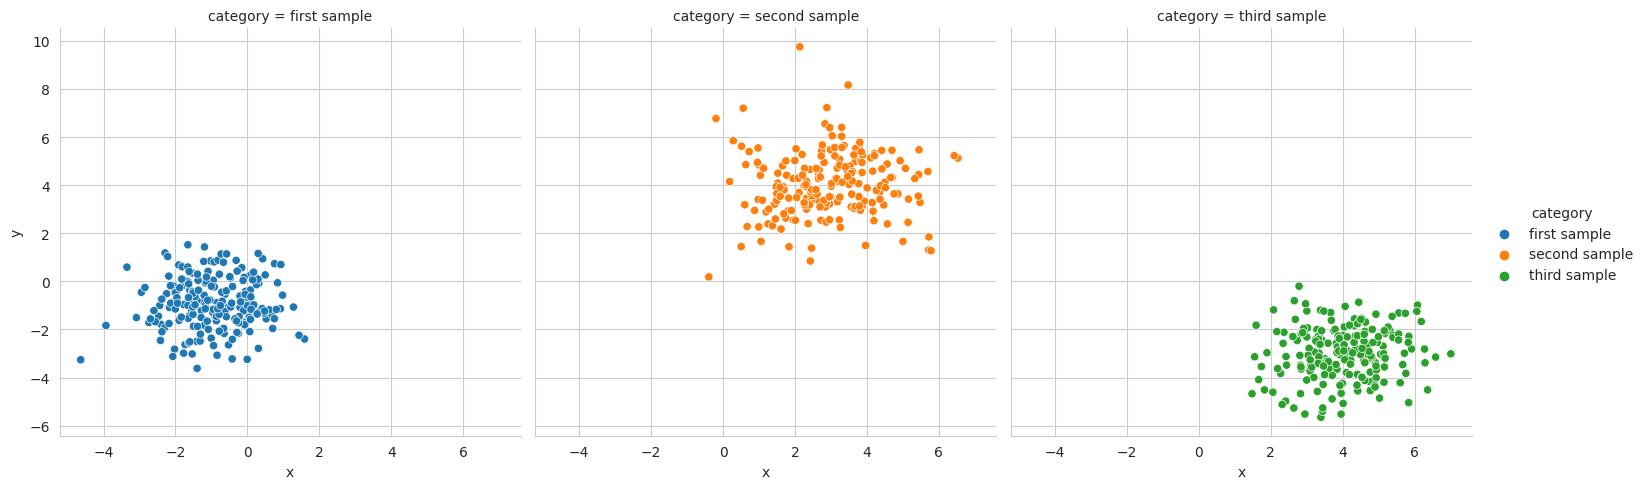

In [69]:
sns.relplot(data=df, x='x', y='y', hue='category', col='category');

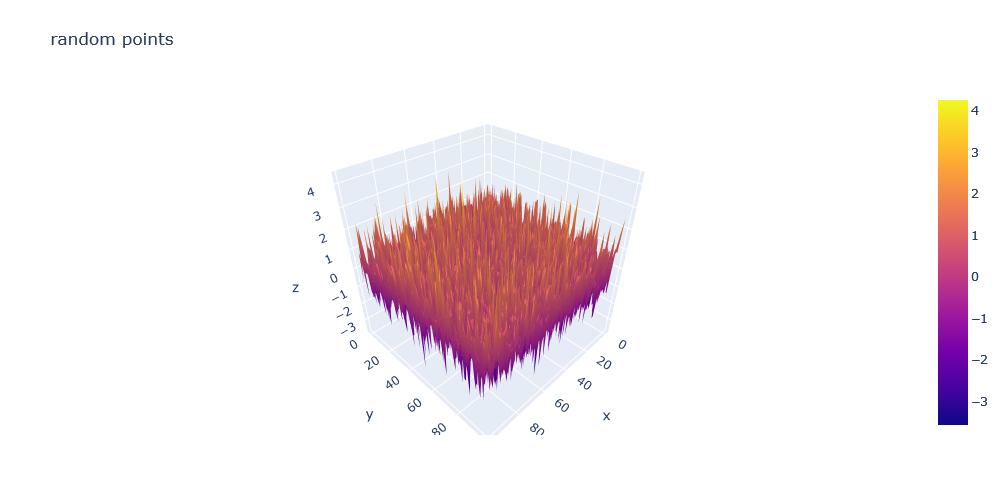

In [84]:
import plotly.graph_objects as go
import pandas as pd
x = list(range(100))
y = list(range(100))
z = np.random.normal(loc=0, scale=1, size=(100, 100))

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

fig.update_layout(title='random points', autosize=False,
                 width=500, height=500,
                 margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# Relational diagram

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as pex

In [5]:
df = pd.read_csv('relational.csv', delimiter=' ')
df1 = pd.DataFrame(df.stack()).reset_index()

In [6]:
#prepare dictionnary for mapping
col = df.columns
dictOfWords = {i: col[i] for i in range(0, len(col))}
my_dict = {dictOfWords[k]: k for k in dictOfWords}

# Mapping
origin = list(df1['level_0'].map(my_dict))
final = list(df1['level_1'].map(my_dict) + 10)
values = list(df1.iloc[:, -1])

# Prepare column name
columns = list(df.columns)
columns = columns + columns

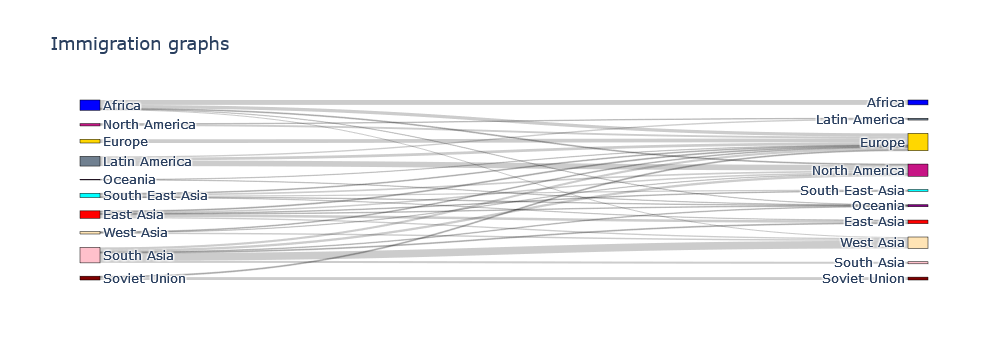

In [7]:
# Plotting
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=columns,
                color=[
                    "blue", "red", "gold", "slategrey", "mediumvioletred", "purple", "pink", "cyan", "maroon",
                    "moccasin", "blue", "red", "gold", "slategrey", "mediumvioletred", "purple", "pink", "cyan",
                    "maroon", "moccasin"
                ]),
            link=dict(source=origin, target=final, value=values))
    ])

fig.update_layout(title_text="Immigration graphs", font_size=13)
fig.show()

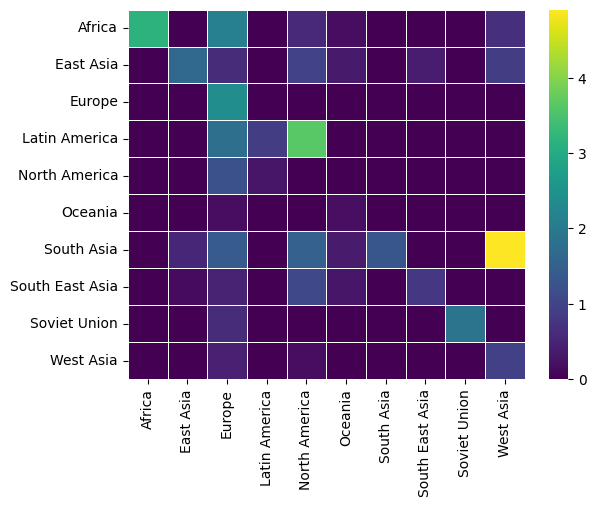

In [8]:
sns.heatmap(df, linewidths=.5, cmap='viridis');